# t-SNE plots
In addition to PCA, t-SNE might have a better chance to distentagle Yemen populations
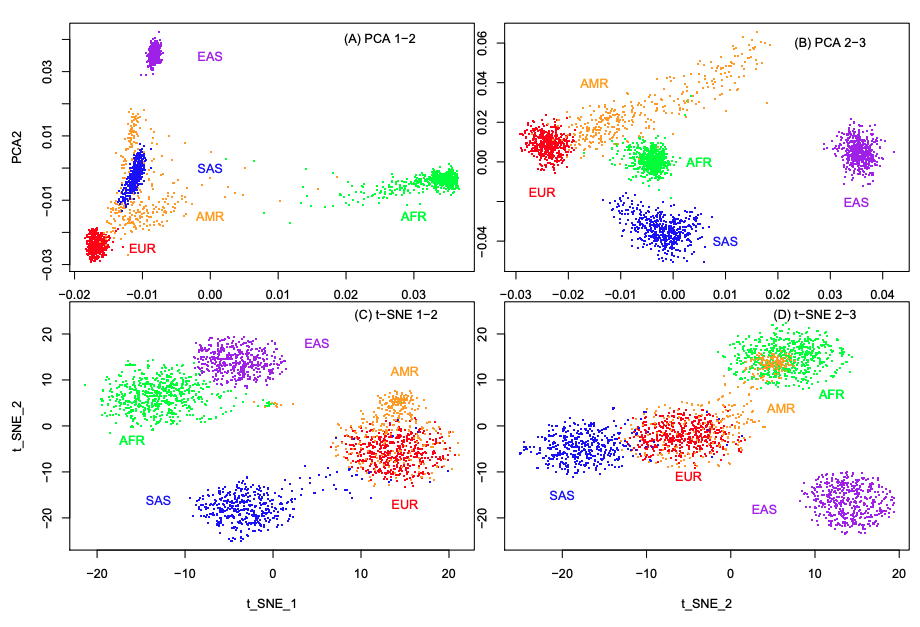

doi: https://doi.org/10.1101/114884

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyplink import PyPlink
from sklearn.manifold import TSNE
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [129]:
tsne = TSNE(2)

In [130]:
base = '../AdmixTools_HO_mind0.01_geno_0.05/yemen_reichHO_mind0.01_geno_0.05.LD.QC'
def loadPlink(base, popsOI=None):    
    with PyPlink(base) as bed:
        bim = bed.get_bim()
        fam = bed.get_fam()
        if popsOI: ## filter input 
            fam = fam[fam.fid.isin(popsOI)].reset_index()
        gen = np.array([geno[fam.index] for n, geno in bed]) ## for UK Biobank: filter genotypes here
    return bim, fam, gen
            

In [131]:
yemenGov = ['Dal', 'Ibb', 'Rsa', 'Dhm', 'Abyn', 'Sad', 'Mhw', 'Byd', 'Lahj', 'Jwf', 'San', 'Hdr', 'Mrb', 'Amr', 'Haj', 'Shb', 'Tiz']
yemenDis = set(('Hadramaut', 'Azal', 'Aden', 'Hudaydah', 'Sheba', 'Tahamh', 'Aljanad' ))

pops = [pop.strip() for pop in open('../Data/popfile_HO_3000.txt') if not pop.endswith('.SDG\n')]
eastafrica = set(("Afar.WGA", "Jew_Ethiopian", "Ethiopia_4500BP_published.SG", "Datog", 'Somali'))
levant = set(("Lebanese", "Palestinian.SDG", "Saudi", 'BedouinB', 'BedouinA'))
regionNames = 'Yemen', 'East Africa', 'Arabia/Levant'

In [132]:
popsOI = yemenDis.union(levant)
bim, fam, gen = loadPlink(base, popsOI)
gen.shape

(97758, 199)

In [133]:
res = tsne.fit_transform(gen.T)

/home/ahenschel/miniconda3/envs/admix/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ahenschel/miniconda3/envs/admix/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [125]:
tsneDF = pd.concat([pd.DataFrame(res, columns=['x','y']), fam], axis=1)
tsneDF['region'] = 'Other'
for region, rname in zip([yemenDis, eastafrica, levant], regionNames):
    tsneDF.loc[tsneDF.fid.isin(region), 'region'] = rname

In [126]:
tsneDF.head()

,x,y,index,fid,iid,father,mother,gender,status,region
0,-15.186294,4.733220,1054,BedouinB,HGDP00607,0,0,2,1,Arabia/Levant
1,-15.093038,3.476412,1055,BedouinB,HGDP00608,0,0,1,1,Arabia/Levant
2,-14.610908,3.374686,1056,BedouinA,HGDP00609,0,0,1,1,Arabia/Levant
3,-15.485309,4.494017,1057,BedouinB,HGDP00610,0,0,1,1,Arabia/Levant
4,-14.789374,4.209636,1058,BedouinA,HGDP00611,0,0,1,1,Arabia/Levant


<AxesSubplot:xlabel='x', ylabel='y'>

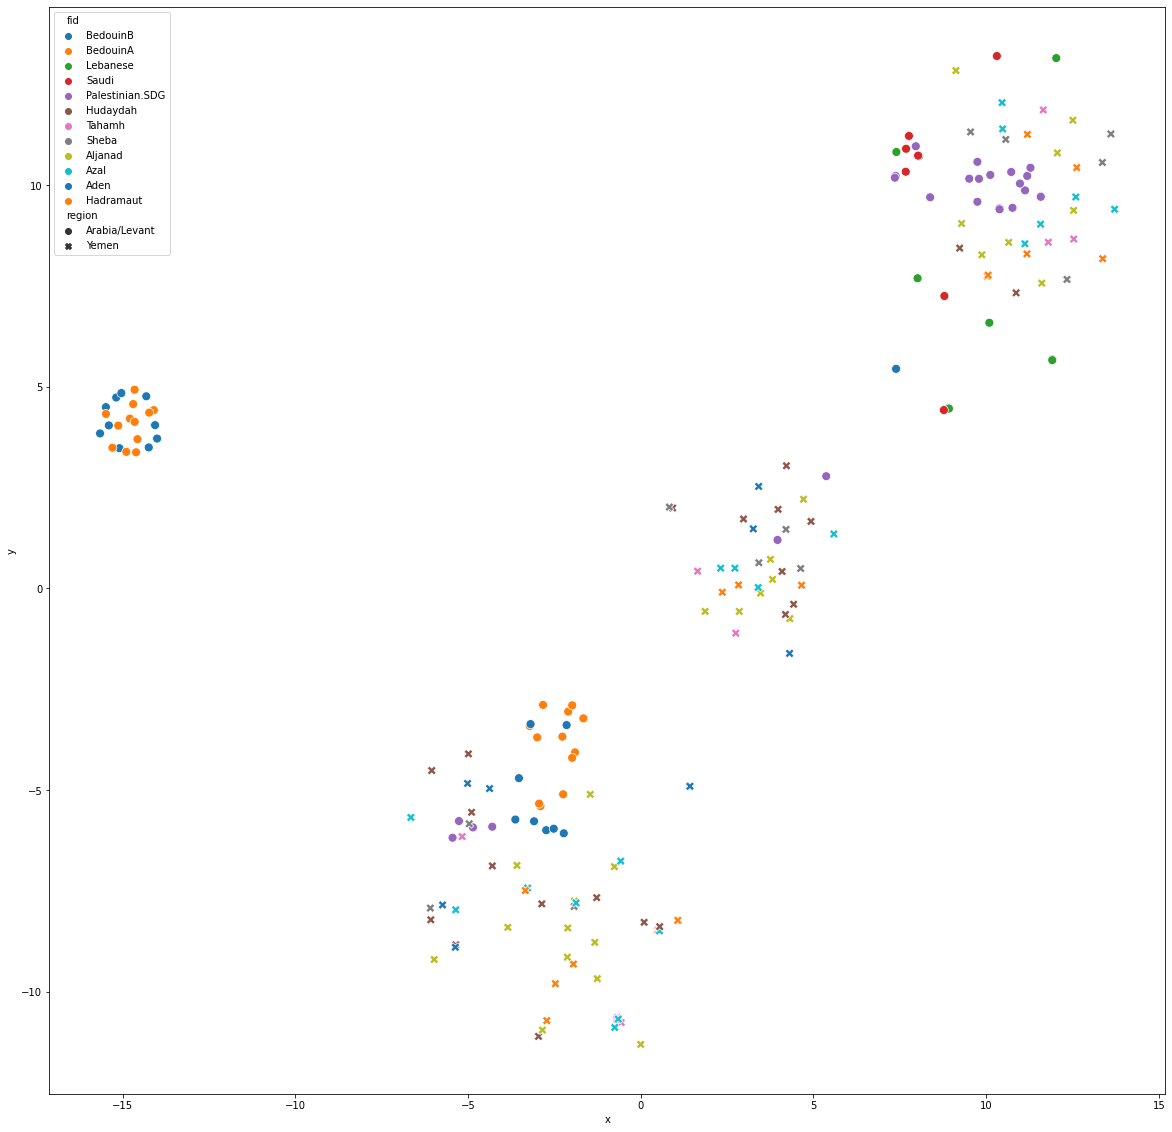

In [127]:
import seaborn as sns
import matplotlib.colors as mcolors
fig, ax = plt.subplots(1, figsize=(20, 20))
sns.scatterplot(x='x',y='y', hue='fid', data=tsneDF, ax=ax, style='region', palette=mcolors.TABLEAU_COLORS.values(), s=80)

In [ ]:

fam[fam.fid.isin(set())]